In [18]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt

class LaplaceOperator:
    def __init__(self):
        path=os.getcwd()
        file = ''.join(path+"/wdg1.gif")
        gif = cv2.VideoCapture(file)
        ret, self.originalImage = gif.read()
        
    
    def Laplacian_by_OpenCV(self):
        ddepth = cv2.CV_16S
        kernel_size = 3
        self.src_gray = cv2.cvtColor(self.originalImage,cv2.COLOR_BGR2GRAY)        
        self.src_blur = cv2.GaussianBlur(self.src_gray,(3,3),0)
        self.dst = cv2.Laplacian(self.src_blur, ddepth, ksize = kernel_size)
        self.output = cv2.convertScaleAbs(self.dst)
        
    def replicate_boundary(self,r_curr, c_curr,row,col):
        r_temp = r_curr
        c_temp = c_curr                       
        if r_temp<0:
            r_temp +=1
        elif r_temp>=row:
            r_temp -=1

        if c_temp<0:
            c_temp +=1
        elif c_temp>=col:
            c_temp -=1
        return r_temp, c_temp

    # edge detecting filter 
    def Laplacian_from_scratch(self):
        self.kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],dtype=np.float32)
        row = len(self.dst)
        col = len(self.dst[0])
        self.mat_filtered = np.zeros((row,col))
        
        for r in range(row):
            for c in range(col):
                for i in range(3):
                    for j in range(3):
                        r_temp, c_temp = self.replicate_boundary(r+i-1,c+j-1,row,col) 
                        self.mat_filtered[r,c] += self.src_blur[r_temp, c_temp]*self.kernel[i,j]

                                
    def Gaussian_from_scratch(self):
        self.gkernel = np.array([[1,2,1],[2,4,2],[1,2,1]],dtype=np.float32)/16
        row = len(self.dst)
        col = len(self.dst[0])
        self.gfiltered = np.zeros((row,col))
        
        for r in range(row):
            for c in range(col):
                for i in range(3):
                    for j in range(3):
                        r_temp, c_temp = self.replicate_boundary(r+i-1,c+j-1,row,col)
                        self.gfiltered[r,c] += self.src_gray[r_temp,c_temp]*self.gkernel[i,j]
                            
    
    
    def showImage(self, imgArray, title):
        plt.imshow(imgArray,cmap="gray")
        plt.title(title)
        
        

In [19]:
L = LaplaceOperator()
L.Laplacian_by_OpenCV()

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

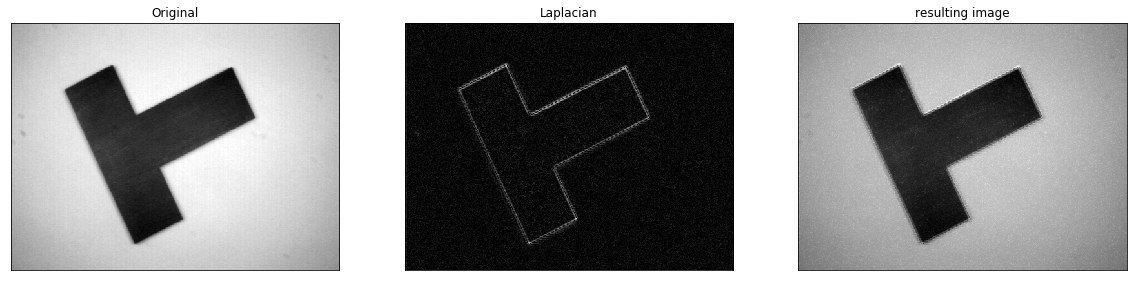

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(131), plt.imshow(L.src_gray,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(L.output, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(L.src_blur+L.output, cmap='gray'),plt.title('resulting image')
plt.xticks([]), plt.yticks([])

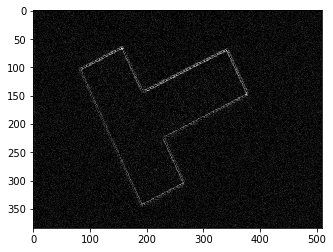

In [21]:
L.Laplacian_from_scratch()
plt.imshow(cv2.convertScaleAbs(L.mat_filtered),cmap='gray')

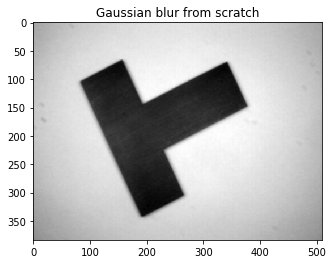

In [22]:
L.Gaussian_from_scratch()
L.showImage(L.gfiltered,"Gaussian blur from scratch")